In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici
from scipy.linalg import toeplitz

In [2]:
# def get_acf(tau,f1,f2):
#     if tau[0]<1e-10:
#         s1,c1=sici(2*np.pi*f1*tau[1:])
#         s2,c2=sici(2*np.pi*f2*tau[1:])
#         return np.hstack([np.log(f2/f1),c2-c1])
#     s1,c1=sici(2*np.pi*f1*tau[1:])
#     s2,c2=sici(2*np.pi*f2*tau[1:])
#     return c2-c1
def get_acf(tau,f1,f2):
    s1,c1=sici(2*np.pi*f1*tau)
    s2,c2=sici(2*np.pi*f2*tau)
    y=c2-c1
    y=np.nan_to_num(y,nan=np.log(f2/f1)+1e-3)
    return y

In [295]:
N=2*1000

In [296]:
taus=np.fft.fftfreq(N)*N
print(taus)
f2=0.5
f1=0.05
print(f1*N,f2*N)
acf1=get_acf(taus[1:],f1,f2)
acf1=np.hstack([np.log(f2/f1),acf1])

[ 0.  1.  2. ... -3. -2. -1.]
100.0 1000.0


In [285]:
get_acf(taus,f1,f2)

/tmp/ipykernel_759539/1944529460.py:12: RuntimeWarning: invalid value encountered in subtract
  y=c2-c1


array([ 2.30358509,  0.67888022, -0.03798157, ..., -0.29334502,
       -0.03798157,  0.67888022])

In [72]:
acf1

array([ 1.60943791,  0.058247  , -0.45851453, ..., -0.43383342,
       -0.45851453,  0.058247  ])

In [5]:
acf1[N//2]

0.0009943527239186958

In [7]:
taus2=np.linspace(0,N//2,N//2*10+1)

In [8]:
taus2,taus

(array([0.000e+00, 1.000e-01, 2.000e-01, ..., 9.998e+02, 9.999e+02,
        1.000e+03]),
 array([ 0.,  1.,  2., ..., -3., -2., -1.]))

In [116]:
acf2=get_acf(taus2[1:],f1,f2)
acf2=np.hstack([10*np.log(f2/f1),10*acf2])

(0.0, 10.0)

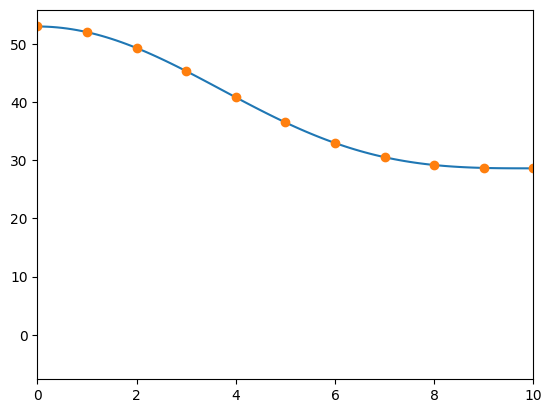

In [124]:
plt.plot(taus2[:N//2],acf2[:N//2])
plt.plot(taus[:N//2],acf1[:N//2],'o')
plt.xlim(0,10)

In [292]:
ps=np.fft.rfft(acf1-np.mean(acf1))

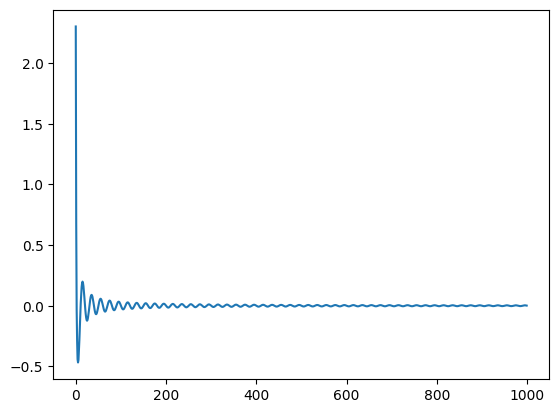

In [293]:
plt.plot(acf1[:1000])

In [33]:
acf1[N//2]

1.0030791030315561e-07

In [294]:
acf1[N//2]

2.5076608034056788e-06

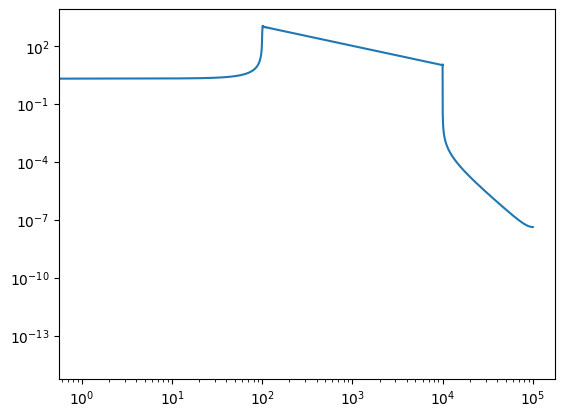

In [36]:
plt.loglog(np.abs(ps))

In [8]:
f1*N, f2*N

(100.0, 1000.0)

In [5]:
ps=np.zeros(N//2+1,dtype='complex128')
ps[int(f1*N):int(f2*N)+1]=1/np.arange(int(f1*N),int(f2*N)+1)
acf_dft=np.fft.irfft(ps)

(0.0, 10.0)

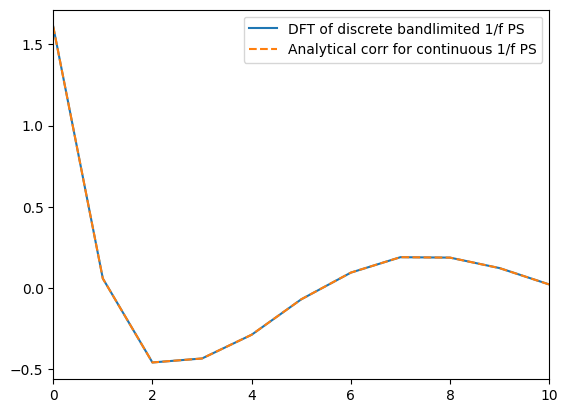

In [6]:
plt.plot(acf_dft*N/2, label='DFT of discrete bandlimited 1/f PS')
plt.plot(acf1,ls='--', label='Analytical corr for continuous 1/f PS')
plt.legend()
plt.xlim(0,10)

In [275]:
acf1=get_acf(taus,f1,f2)
print(acf1)

[ 1.61043791  0.058247   -0.45851453 ... -0.43383342 -0.45851453
  0.058247  ]


/tmp/ipykernel_3397421/1944529460.py:12: RuntimeWarning: invalid value encountered in subtract
  y=c2-c1


In [327]:
C=toeplitz(acf1[:N//2])+np.eye(N//2)*1e-3
# C+=np.ones(C.shape,dtype='float64')*10000
Cinv=np.linalg.inv(C)

In [239]:
Cinv@C

array([[ 1.00000000e+00,  5.55493151e-14, -1.09422020e-14, ...,
        -5.74193471e-16, -4.07660017e-16, -9.15933995e-16],
       [ 6.33607750e-14,  1.00000000e+00, -5.28070426e-14, ...,
        -2.65065747e-15, -2.43706964e-15, -3.17107451e-15],
       [ 8.63441263e-14,  5.10425036e-14,  1.00000000e+00, ...,
        -6.28663788e-15, -5.87724314e-15, -5.90499871e-15],
       ...,
       [-1.13103971e-15,  2.63677968e-15,  3.92741395e-15, ...,
         1.00000000e+00, -6.35602682e-15, -1.46271883e-14],
       [-8.43075609e-16,  1.43288159e-15,  2.52575738e-15, ...,
        -8.93382590e-15,  1.00000000e+00, -5.96744876e-15],
       [-5.68989300e-16,  6.29704622e-16,  1.41900380e-15, ...,
        -5.84254867e-15, -6.93889390e-17,  1.00000000e+00]])

In [209]:
npoints=10000
dtaus=np.arange(1,npoints+1)/npoints
coeff_arr = np.zeros((len(dtaus),N//2))
my_tau = taus[:N//2].copy()

In [205]:
dtaus[0]=1e-14

In [187]:
dtaus=np.sort(np.random.rand(npoints))

In [341]:
vec=get_acf(my_tau,f1,f2)
C2=toeplitz(vec)

/tmp/ipykernel_759539/1944529460.py:12: RuntimeWarning: invalid value encountered in subtract
  y=c2-c1


In [342]:
vec=get_acf(my_tau+1,f1,f2)

In [344]:
C2[0,0]-vec.T@Cinv@vec #error in krig prediction

0.9838900953479843

In [210]:
for i,dtau in enumerate(dtaus):
    tau=my_tau+dtau
    vec=get_acf(tau,f1,f2)
    vec=vec[::-1]
    coeff=Cinv@vec
    coeff_arr[i,:]=coeff

In [302]:
coeff_arr.shape

(10000, 1000)

In [198]:
u,s,vT=np.linalg.svd(coeff_arr)

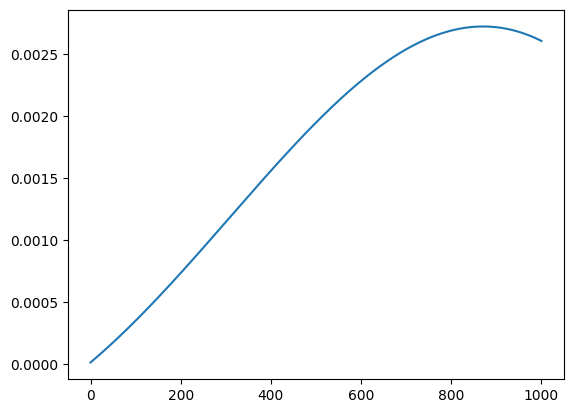

In [199]:
plt.plot(coeff_arr[:,1])

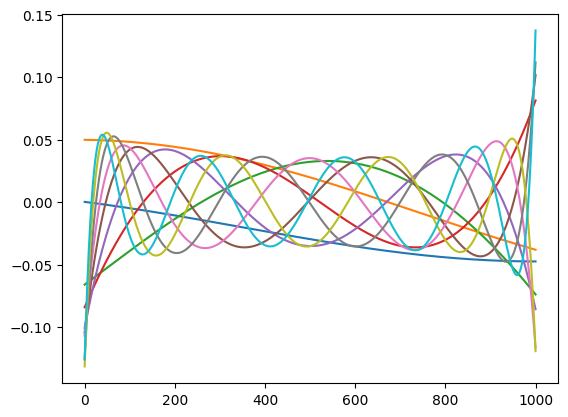

In [200]:
plt.plot(u[:,:10])
# plt.xlim(0,100)

In [211]:
u1,s1,vT1=np.linalg.svd(coeff_arr)

Text(0, 0.5, 'Cost ~FLOPS')

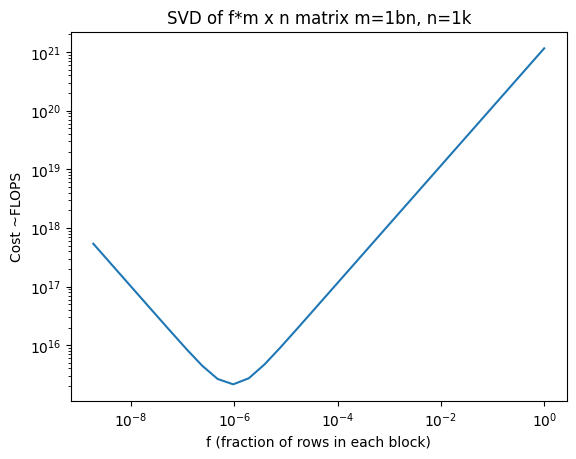

In [75]:
n=1000
m=1<<30
frac=2.**np.arange(-29,1)
a=frac*m
p=1/frac
svd_cost=p*(n*a**2+n**3)
plt.loglog(frac,svd_cost)
plt.title("SVD of f*m x n matrix m=1bn, n=1k")
plt.xlabel("f (fraction of rows in each block)")
plt.ylabel("Cost ~FLOPS")

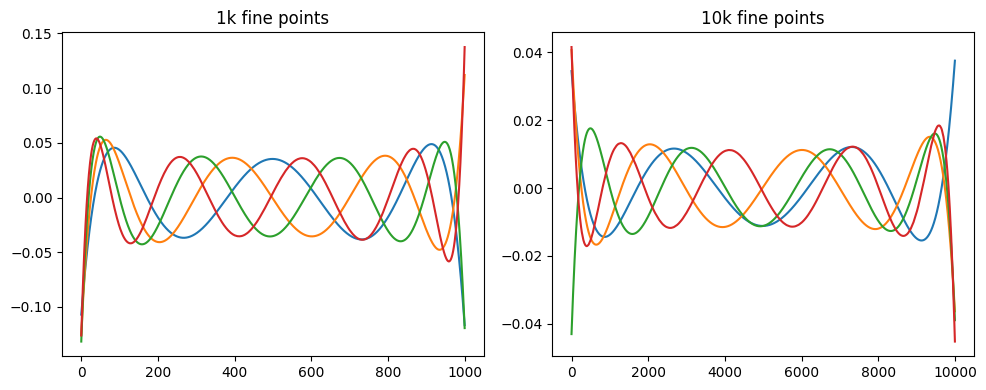

In [208]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.title("1k fine points")
plt.plot(u[:,6:10])
plt.subplot(122)
plt.title("10k fine points")
plt.plot(-u1[:,6:10])
plt.tight_layout()

In [119]:
coeff_arr.shape

(1001, 1000)

In [182]:
s1/s / np.sqrt(10000/1000)

array([ 0.99949232,  1.00023393,  0.99975179,  1.00010816,  1.00065581,
        1.00015413,  0.99954538,  1.00082924,  1.00086175,  0.99941782,
        1.00046705,  1.00983037,  1.03219622,  1.0294852 ,  0.98332237,
        1.00126818,  1.00562699,  0.99832779,  1.01403921,  0.9947645 ,
        0.97677693,  1.00422795,  0.96589232,  1.00874957,  0.96373162,
        0.96041733,  1.04649035,  1.02881736,  1.07052099,  1.03117196,
        1.0161367 ,  1.03392448,  1.00732733,  0.96309038,  0.99972749,
        0.97799318,  0.97522647,  1.01662361,  0.9746495 ,  1.00287077,
        0.99894782,  1.02079233,  1.00403761,  1.03582504,  1.00753665,
        1.07728708,  1.06953441,  1.06824827,  1.04667172,  1.07280423,
        1.09102713,  1.06759237,  1.03121581,  1.02151556,  1.01445459,
        1.03641905,  1.02494128,  1.03417161,  1.03462406,  0.98788291,
        0.99262508,  1.01225279,  1.02001134,  1.02525074,  1.02148357,
        1.00290484,  1.02019944,  1.01238187,  1.04350685,  1.06

Text(0.5, 0, 'predicted point')

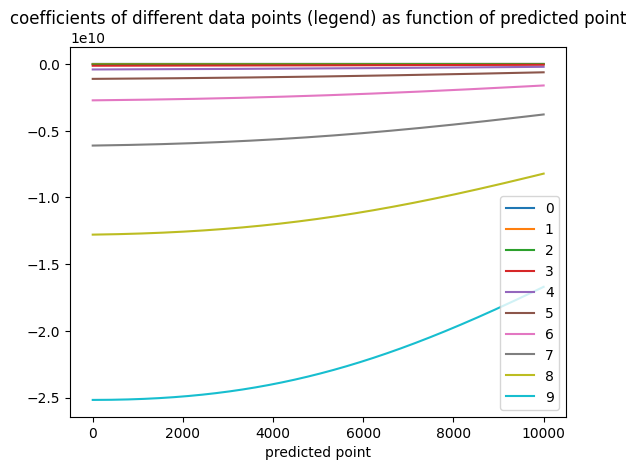

In [33]:
plt.plot(coeff_arr[:,0:10],label=[0,1,2,3,4,5,6,7,8,9])
plt.legend()
plt.title("coefficients of different data points (legend) as function of predicted point")
plt.xlabel("predicted point")
# plt.xlim(0,10)

In [326]:
s1

array([1.87849542e+02, 1.93244585e+01, 3.59386909e+00, 7.22800784e-01,
       3.98064034e-02, 2.13338593e-03, 1.34337837e-04, 7.38137923e-06,
       1.40772347e-07, 8.35978124e-09, 2.54828528e-10, 1.13991228e-11,
       1.01330845e-11, 9.87113810e-12, 7.93199348e-12, 5.77004247e-12,
       5.34047531e-12, 5.30287111e-12, 5.02884871e-12, 5.00432562e-12,
       4.98936044e-12, 3.96126392e-12, 3.52902787e-12, 3.09529571e-12,
       2.85988618e-12, 2.80113772e-12, 2.47543100e-12, 2.41367929e-12,
       2.20218877e-12, 2.14752468e-12, 2.12866973e-12, 2.05115398e-12,
       2.03695862e-12, 1.97345229e-12, 1.87420637e-12, 1.85453264e-12,
       1.82750932e-12, 1.72764419e-12, 1.69533685e-12, 1.61873744e-12,
       1.58642084e-12, 1.43855279e-12, 1.41494213e-12, 1.36110828e-12,
       1.34458099e-12, 1.25232504e-12, 1.24913659e-12, 1.20966971e-12,
       1.17778686e-12, 1.11437963e-12, 1.08272946e-12, 1.06777874e-12,
       1.06594109e-12, 1.03136544e-12, 1.03085775e-12, 1.00637082e-12,
      

In [328]:
s1[:5]/s1[0]

array([1.00000000e+00, 1.02872002e-01, 1.91316361e-02, 3.84776441e-03,
       2.11905778e-04])

In [19]:
u1.shape

(10000, 10000)

In [129]:
legcoeffs=np.zeros((5,9),dtype='float64')

In [212]:
# only 5 most significant sing vals
for i in range(5):
    colnum=i
    legcoeffs[i,:]=np.linalg.pinv(np.polynomial.legendre.legvander(np.linspace(-1,1,1001),8))@u[:,colnum]
    # plt.plot(np.polynomial.legendre.legval(np.linspace(-1,1,1000),legcoeff))
    # plt.plot(u[:,colnum])

In [273]:
pt=1e-9
pt_leg  = 2*pt - 1
pt_leg

-0.999999998

In [274]:
uu=np.zeros(5,dtype='float64')
for i in range(5):
    uu[i]=np.polynomial.legendre.legval(pt_leg,legcoeffs[i,:])

In [350]:
tau=my_tau+1e-9
vec=get_acf(tau,f1,f2)
vec=vec[::-1]
actual_coeff=Cinv@vec

In [351]:
pred_coeff = uu@np.diag(s[:5])@vT[:5,:]

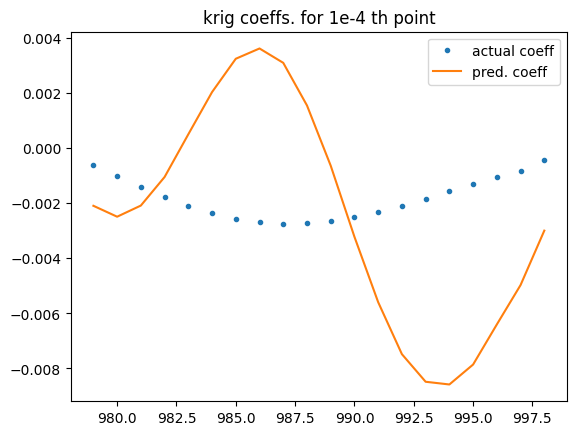

In [352]:
plt.title("krig coeffs. for 1e-4 th point")
plt.plot(np.arange(979,999),actual_coeff[979:999],'.',label='actual coeff')
plt.plot(np.arange(979,999),pred_coeff[979:999],label='pred. coeff')
plt.legend()

In [ ]:
nlevels=12
nsamps=N//2
ndata=4000
bank = np.zeros((levels,nsamps))
spec = np.zeros(ndata)

for i in range(nlevels):
    for j in range(ndata):
        #get contribution to every point from each level
        fs=10**(nlevels-i)
        coeffs=eval_coeffs(j/fs) # pt number j/1e10
        spec[j]+=coeffs@bank[i]
        #if integer multiple
            #add noise
            #roll the bank

In [300]:
250e6/1e12

0.00025

In [299]:
1/25e-5

4000.0